## Gibbs sampling: simple example

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

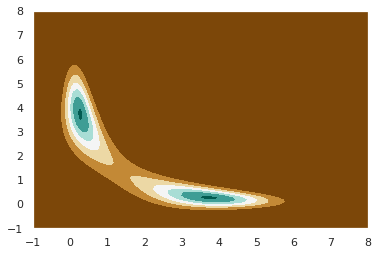

In [132]:
pxy = lambda x, y: np.exp(-(x*x*y*y+x*x+y*y-8*x-8*y) / 2.)
xx = np.linspace(-1, 8, 100)
yy = np.linspace(-1, 8, 100)
xg, yg = np.meshgrid(xx, yy)
z = pxy(xg.ravel(), yg.ravel())
z2 = z.reshape(xg.shape)
plt.contourf(xg, yg, z2, cmap='BrBG')


In [134]:
N = 50_000
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0], y[0] = 1., 6.

sig = lambda z: np.sqrt(1./ (1. + z * z))
mu = lambda z: 4. / (1. + (z * z))

for i in range(1, N, 2):
    sig_xy, mu_xy = sig(y[i-1]), mu(y[i-1])
    # x[i] = p(x | y[i -1])
    x[i] = np.random.normal(mu_xy, sig_xy)
    y[i] = y[i-1]

    sig_yx, mu_yx = sig(x[i]), mu(x[i])
    # y[i + 1] = p(y | x[i])
    y[i+1] = np.random.normal(mu_yx, sig_yx)
    x[i+1] = x[i]

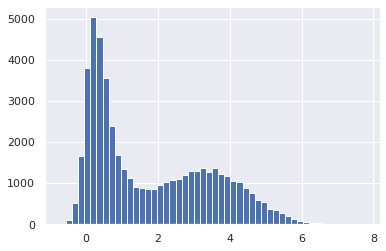

In [135]:
plt.hist(x, bins=50);

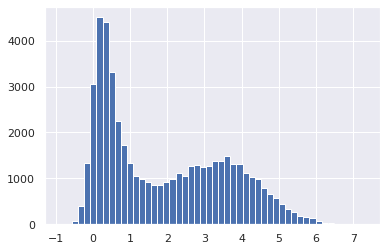

In [136]:
plt.hist(y, bins=50);

In [146]:
x[:3,]

array([1.        , 0.13711376, 0.13711376])

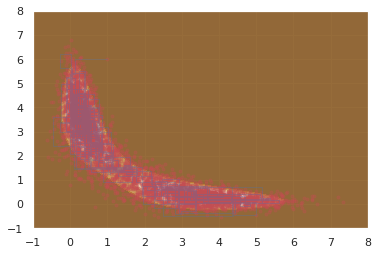

In [160]:
plt.contourf(xg, yg, z2, alpha=0.8, cmap='BrBG')
plt.plot(x[::10],y[::10], '.', c='r', alpha=0.3)
plt.plot(x[:400],y[:400], c='b', alpha=0.3, lw=1)
# plt.xlim(-10, 10)
# plt.ylim(-5, 5)
